# Triangle diagram
In this notebook, I calculate a triangle diagram for an arbitrary case
Internal masses are noted $m_i$, $i=1,2,3$, The symmetric external masses are noted by $M_i$, $i=1,2,3$.

The fuction ```Isc(m1sq,m2sq,m3sq,M1sq,M2sq,M3sq)``` calculates amplitude for the triangle graph, shown in the figure below.
![Triangle diagram to introduce notations](pict/triangle.png)

In [1]:
using QuadGK
using Plots
gr(fmt = :png)

Plots.GRBackend()

In [2]:
function Isc(m1sq, m2sq, m3sq, M1sq, M2sq, M3sq)
    function integrand(x)
        A = M1sq;
        B = m2sq + x*M2sq - (1-x)*M1sq - x*M3sq-m3sq;
        C = x*m1sq + (1-x)*m3sq - x*(1-x)*M2sq;
        D = B^2-4*A*C;
        y1, y2 = (-B .- sqrt(D) .* [1.0, -1.0]) ./ (2*A);
        return (log((1-x-y2)/(-y2))-log((1-x-y1)/(-y1)))/(A*(y2-y1))
    end
    integr = quadgk(integrand, 0, 1)[1];
    return integr/(16*π^2);
end

Isc (generic function with 1 method)

## Triangle for $P_c(4450)$

The considered reaction is
$$
\Lambda_b \to (K\,p)\, \chi_{c1} \to K (J/\psi\, p)
$$

For the existing $Kp$-resonance $\Lambda(1890)$, the enhansement is strong but still on the threshold. 

In [3]:
ell = LinRange(4.1,5.2,250)
mΧc1 = 3.510
mp = 0.938
mΛb = 5.619
mΛ = 2.07
mKp = 0.4936;
data_Pc = [Isc(mΛ^2-1im*0.001,mΧc1^2,mp^2,e^2,mKp^2,mΛb^2) for e in ell];

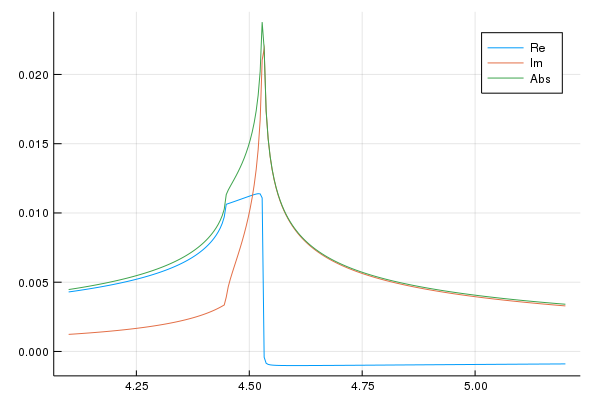

In [8]:
plot(ell, [real.(data_Pc) imag.(data_Pc)], lab=["Re" "Im"])
# plot!(ell,, lab=)
plot!(ell, abs.(data_Pc), lab="Abs")